In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle

In [73]:
data = pd.read_csv('Suicide_Ideation_Dataset(Twitter-based).csv')


In [74]:
data.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


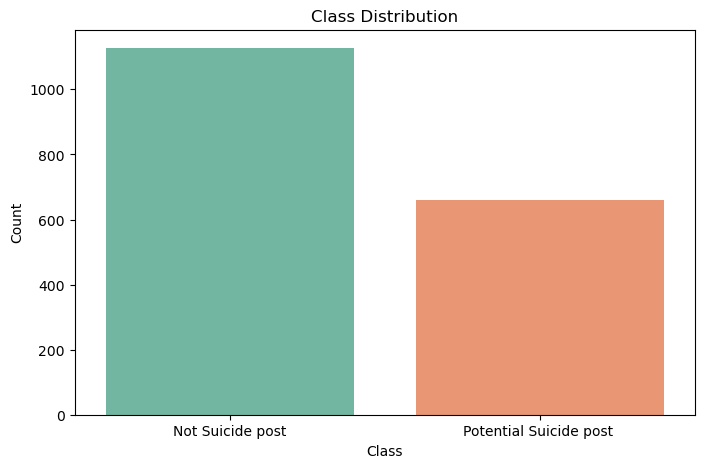

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Suicide', data=data, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [76]:

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(text)

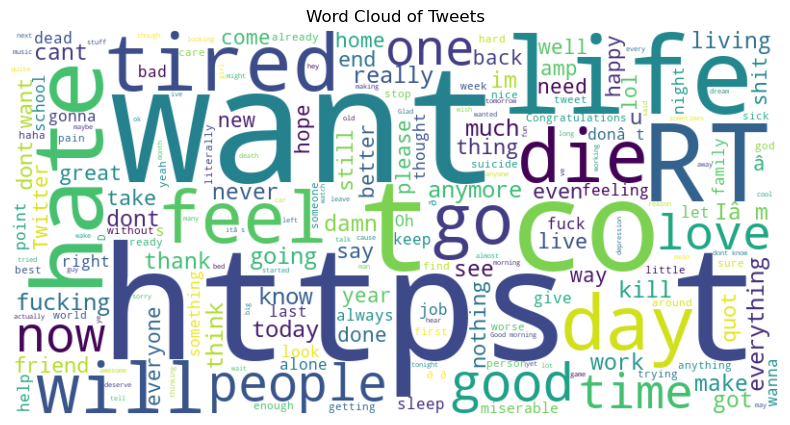

In [77]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()

In [78]:
data.dropna(inplace=True)
X = data['Tweet']
y = data['Suicide']

In [79]:
X

0                                       making some lunch
1                             @Alexia You want his money.
2       @dizzyhrvy that crap took me forever to put to...
3       @jnaylor #kiwitweets Hey Jer! Since when did y...
4       Trying out &quot;Delicious Library 2&quot; wit...
                              ...                        
1782      i have forgotten how much i love my Nokia N95-1
1783    Starting my day out with a positive attitude! ...
1784    @belledame222 Hey, it's 5 am...give a girl som...
1785    2 drunken besties stumble into my room and we ...
1786    @dancingbonita &quot;I friggin love you!!!&quo...
Name: Tweet, Length: 1785, dtype: object

In [80]:
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [81]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [82]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
    }

In [83]:
results

{'Logistic Regression': {'accuracy': 0.8991596638655462},
 'Naive Bayes': {'accuracy': 0.9159663865546218},
 'Support Vector Classifier': {'accuracy': 0.927170868347339},
 'Random Forest': {'accuracy': 0.9411764705882353}}

In [84]:
import matplotlib.pyplot as plt

In [85]:
model_names = list(results.keys())
accuracies = [results[model]["accuracy"] * 100 for model in model_names]

In [86]:
colors = ['red', 'green', 'blue', 'purple']

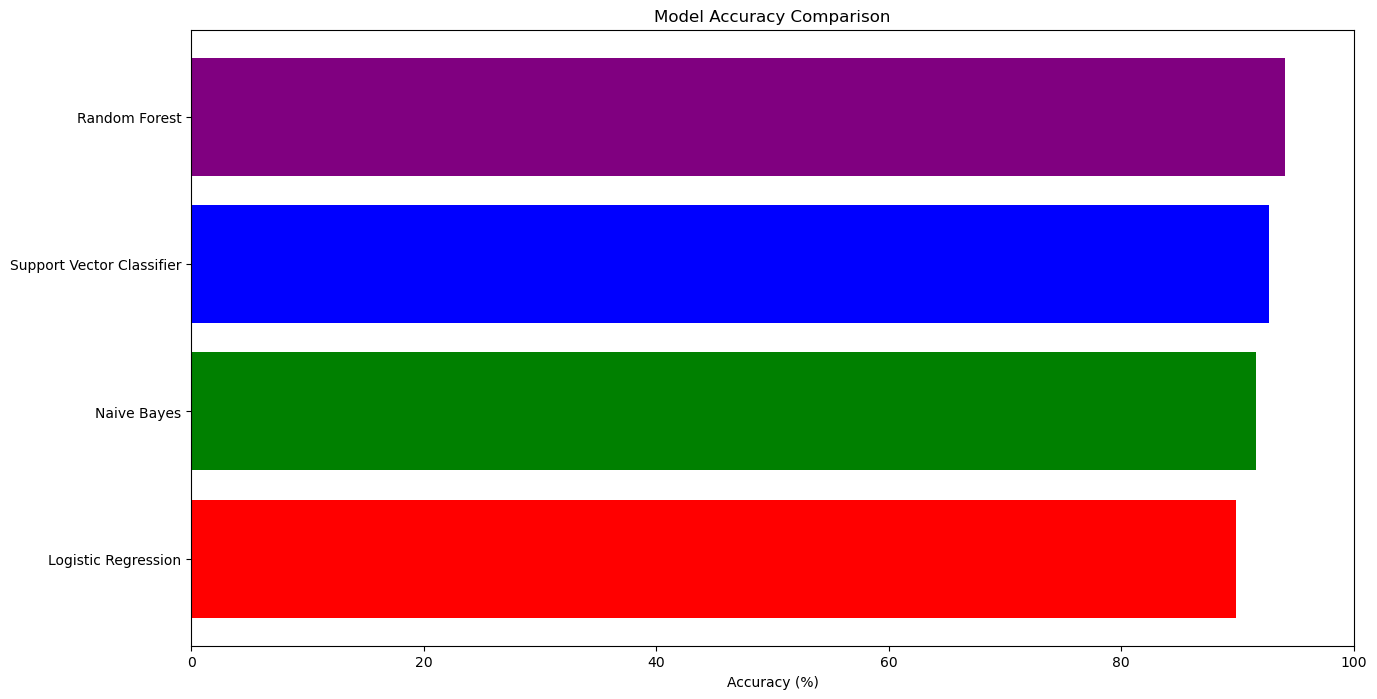

In [87]:
plt.figure(figsize=(15, 8))
plt.barh(model_names, accuracies, color=colors)
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 100)
plt.show()

In [88]:
best_model = models["Logistic Regression"]

In [89]:
pickle.dump(best_model, open("best_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))